In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CT_Scans/train',
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/CT_Scans/valid',
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Load InceptionV3 with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Adjust the number of epochs
    verbose=1
)

# Evaluation
validation_accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')



Found 843 images belonging to 4 classes.
Found 180 images belonging to 4 classes.
Epoch 1/100
106/106 [==============================] - 71s 338ms/step - loss: 0.8002 - accuracy: 0.7248 - val_loss: 3.3206 - val_accuracy: 0.4889
Epoch 2/100
106/106 [==============================] - 29s 272ms/step - loss: 0.5141 - accuracy: 0.8078 - val_loss: 3.1184 - val_accuracy: 0.6722
Epoch 3/100
106/106 [==============================] - 29s 272ms/step - loss: 0.4430 - accuracy: 0.8387 - val_loss: 6.2485 - val_accuracy: 0.6556
Epoch 4/100
106/106 [==============================] - 29s 273ms/step - loss: 0.3842 - accuracy: 0.8493 - val_loss: 4.7092 - val_accuracy: 0.7444
Epoch 5/100
106/106 [==============================] - 30s 285ms/step - loss: 0.3939 - accuracy: 0.8493 - val_loss: 5.6494 - val_accuracy: 0.4833
Epoch 6/100
106/106 [==============================] - 30s 277ms/step - loss: 0.4501 - accuracy: 0.8351 - val_loss: 4.3382 - val_accuracy: 0.3444
Epoch 7/100
106/106 [=====================

In [ ]:
model.save('my_inceptionv3_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
# Load the pre-trained model
model =load_model('/content/my_inceptionv3_model.h5')

# Define class labels
class_labels = ['Benign', 'Malignant', 'COVID','Normal']

# Create a validation data generator
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/CT_Scans/test',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_true = test_generator.classes

# Predict probabilities
y_pred = model.predict(test_generator)

threshold = 0.5  # Threshold for binary classification
y_pred_binary = np.zeros_like(y_pred)  # Initialize binary predictions array
y_pred_multiclass = np.argmax(y_pred_binary, axis=1)



print("Classification Report:\n", classification_report(y_true, y_pred_multiclass))


# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_multiclass)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()


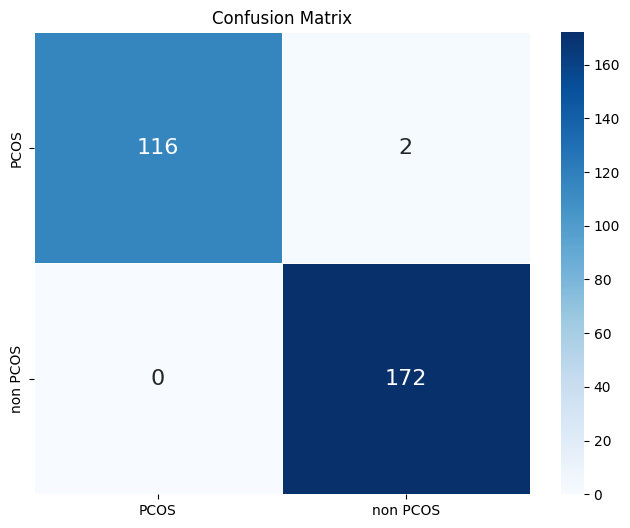

Classification Report:
               precision    recall  f1-score   support

        PCOS       1.00      0.98      0.99       118
    non PCOS       0.99      1.00      0.99       172

    accuracy                           0.99       290
   macro avg       0.99      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290



In [ ]:
confusion = confusion_matrix(y_true, y_pred_binary)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.title('Confusion Matrix')

# Adjust the position of the tick marks for the x-axis and y-axis
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_binary, target_names=class_labels))

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from google.colab import files
import io
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/my_inceptionv3_model.h5')



In [ ]:

# Upload an image from your local machine to Colab

import numpy as np
from tensorflow.keras.preprocessing import image

# Function to make predictions on a single image
def predict_single_image(image_path, model):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image (if necessary)

    # Make predictions using the model
    prediction = model.predict(x)

    # Interpret the binary prediction result
    print(prediction)
    if prediction > 0.5:
        result = 0
    else:
        result = 1

    return result

# Example usage:
image_path = '/content/pcos infected.PNG' # Replace with the path to your image
result = predict_single_image(image_path, model)
print(f"Prediction: {result}")


1/1 [==============================] - 10s 10s/step
[[0.04880967]]
Prediction: Infected


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load your clinical data into a pandas DataFrame (replace 'data.csv' with your file path)
data = pd.read_csv('PCOS.csv')
# Separate features (X) and target variable (y)
X=data.drop(columns=['PCOS (Y/N)','Sl. No','Patient File No.'])
y = data['PCOS (Y/N)']


from sklearn.impute import SimpleImputer

# Impute missing values (NaN) with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Feature selection: Select the top 20 features using SelectKBest and Chi-Square

k_best = SelectKBest(score_func=chi2, k=20)  # You can adjust the value of k
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)


from sklearn.ensemble import RandomForestClassifier

# Feature data for the three entries (replace with your actual data)
data = [[494.08, 2.54, 0.88, 6.3, 494.08, 40, 36, 6.63, 10.52, 0, 1, 1, 68.8, 10, 0.36, 0, 2, 1, 33, 25.3]]


# Load your trained Random Forest model (replace with your actual model)
# For illustration purposes, we'll create a simple model.
rf_model = RandomForestClassifier(max_depth=20, random_state=42, n_estimators=100, criterion='gini', max_features='sqrt', bootstrap=True)

# Train the model with your data (replace with actual training data)
rf_model.fit(X_train_selected, y_train)

# Predict PCOS for the three entries
pcos_predictions = rf_model.predict(data)
if pcos_predictions==1 and result==1:
  print("YOU HAVE PCOS")
elif pcos_predictions==0 and result==1:
  print("YOU ARE MORE PRONE TO HAVE PCOD")
elif pcos_predictions==1 and results==0:
  print ("YOU ARE MORE PRONE TO HA")




YOU DONT HAVE PCOS


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CT_Scans/train',
    target_size=(224, 224),  # MobileNet requires input size of (224, 224)
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/CT_Scans/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load MobileNet with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming you have 4 classes

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    verbose=1
)

# Evaluation
validation_accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
